# PyCaret Predictive Modeling
**Goal 1:** Predict late flag using predictors in PyCaret.  
**Goal 2:** Predict Gross Profit using predictors in PyCaret.

## Goal 1
## Exploratory Data Analysis

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_4.csv', sep='\t')

# displaying first five rows
df.head()

,Sales Order Number,Quantity,Unit List Price,Production Order Number,Customer for-Order,Order Date,Commit Date,Ship Date,Throughput,Days Late,...,Component D Lead Time,Delivery Number,Carrier,Base Freight,Premium,Total Freight Cost,Total Labor Cost,Total Material Cost,QTY X List Price,Gross Margin
0,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,...,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752
1,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,...,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752
2,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,...,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752
3,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,...,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752
4,O-10047,12,650,P-10047,1,5/28/2011,6/27/2011,6/30/2011,33,3.128457,...,20,D-10047,CarrierA,1000,500,1500,12852,1200,7800,-7752


In [3]:
# counting data types
df.dtypes.value_counts()

int64      41
object     11
float64     5
dtype: int64

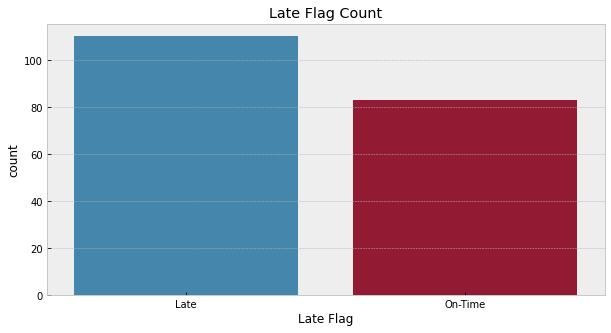

In [4]:
# checking label distrubution count
plt.style.use('bmh')
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Late Flag', data=df)
plt.title('Late Flag Count');

In [5]:
# counting feature nulls
feat_null_counts = df.isna().sum().sort_values(ascending=False)
feat_null_counts[feat_null_counts > 0]

Late Code    83
dtype: int64

In [6]:
# removing features with at least 50% nulls or 50% zeros
import numpy as np

drop_cols = df.columns[((df == np.nan).sum() > (0.50 * df.shape[1])) | ((df == 0).sum() > (0.50 * df.shape[1]))]
df.drop(drop_cols, axis=1, inplace=True)

In [7]:
# counting features with less than 50% zeros
len(df.columns[(df == 0).sum() <= (0.50 * df.shape[1])])

35

In [8]:
# importing module
from pycaret.classification import *

# initializing setup
clf1 = setup(
    df, 
    target='Late Flag', 
    train_size=0.8, 
    feature_selection=True, 
    feature_selection_threshold=0.5,
    fold=5
)

,Description,Value
0,session_id,7644
1,Target,Late Flag
2,Target Type,Binary
3,Label Encoded,"Late: 0, On-Time: 1"
4,Original Data,"(193, 35)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# returning best model based on accuracy
best_model = compare_models(n_select=10, sort='AUC', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9935,1.0000,1.0000,0.9857,0.9926,0.9869,0.9873,0.0200
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0180
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1400
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0200
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0600
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1740
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0360
lr,Logistic Regression,0.9871,0.9991,0.9846,0.9846,0.9846,0.9735,0.9735,0.6180
knn,K Neighbors Classifier,0.7733,0.8743,0.7808,0.7132,0.7389,0.5403,0.5494,1.1920
lda,Linear Discriminant Analysis,0.6822,0.6913,0.6192,0.6132,0.6118,0.3431,0.3469,0.0240


AUC for logistic regression, Naive Bayes, Random Forest, Gradient Boosting, Extra Trees, Light Gradient Boosting, Decision Trees, and Ada Boost is identical 1.00. A perfect AUC indicates these models are probably overfitting the training data. A few features might be causing this issue.

In [10]:
# storing objects as pandas dataframe
pycaret_models_results = pull()
type(pycaret_models_results)

pandas.core.frame.DataFrame

In [11]:
# setting plot style
plt.style.use('seaborn')

# list of plots to plot
plot_list = ['auc', 'confusion_matrix', 'pr', 
             'feature', 'vc', 'learning']

# disabling matplotlib font manager logger
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## Best Performing Model Metrics
This section will illustrate visualizations for a good performing model.

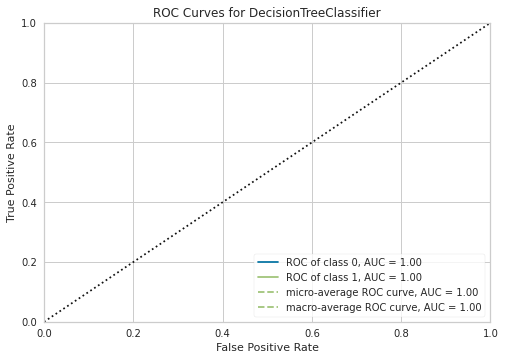

In [12]:
plot_model(best_model[1], plot=plot_list[0])

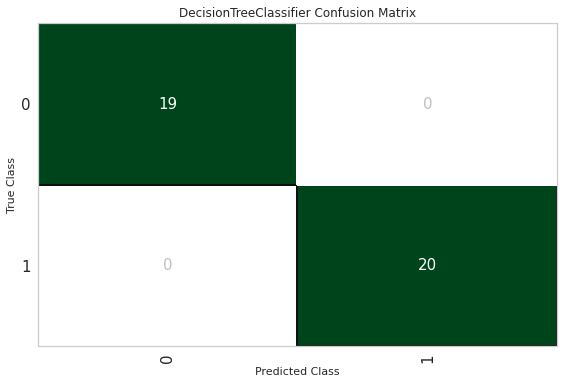

In [13]:
plot_model(best_model[1], plot=plot_list[1])

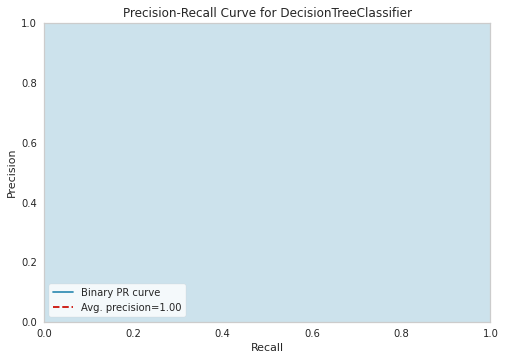

In [14]:
plot_model(best_model[1], plot=plot_list[2])

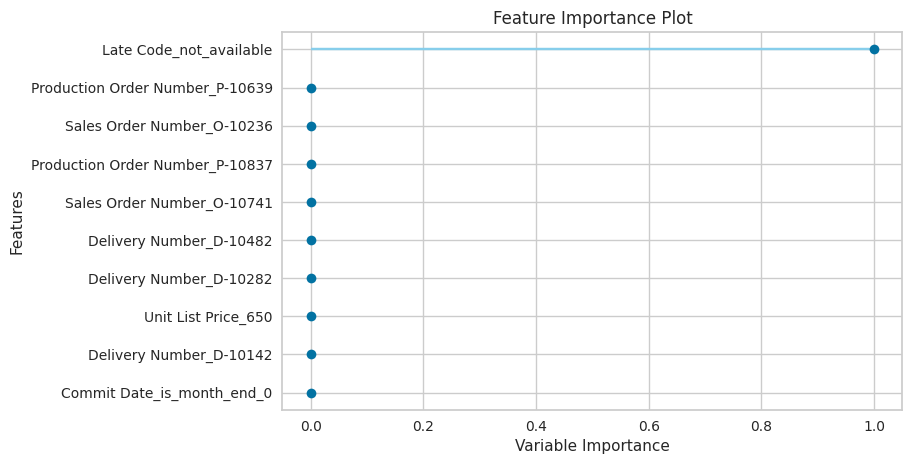

In [15]:
plot_model(best_model[1], plot=plot_list[3])

The most important predictor related to late deliveries using a decision tree classifier model is **Late Code Not Available** with a variable score 0f 1.0. The rest of the features have scores of 0.0. The model seems to overfit the training data. Also, I do not believe an unavailable late code is a good indicator to predict late deliveries.

## Goal 2

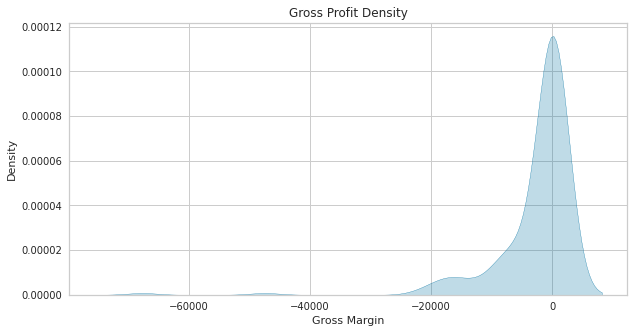

In [16]:
# checking label distribution density
plt.figure(figsize=(10,5))
ax = sns.kdeplot(x='Gross Margin', data=df, fill=True)
plt.title('Gross Profit Density');

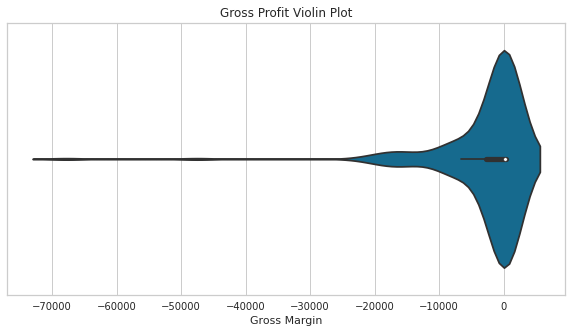

In [17]:
# checking label distrubution count
plt.figure(figsize=(10,5))
ax = sns.violinplot(x='Gross Margin', data=df)
plt.title('Gross Profit Violin Plot');

In [18]:
# importing module
from pycaret.regression import *

# initializing setup
reg1 = setup(
    df, 
    target='Gross Margin', 
    train_size=0.8, 
    feature_selection=True, 
    feature_selection_threshold=0.5,
    fold=5
)

,Description,Value
0,session_id,7861
1,Target,Gross Margin
2,Original Data,"(193, 35)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,23
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(154, 208)"


In [19]:
# returning best model based on accuracy
best_model_reg = compare_models(n_select=10, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,15.5281,513.5274,21.8752,1.0000,0.2058,0.0888,1.3260
lr,Linear Regression,63.7777,8035.2778,87.8204,0.9996,0.6449,0.4645,0.6540
llar,Lasso Least Angle Regression,58.6227,17314.3754,128.0349,0.9989,0.4688,0.3357,0.6620
en,Elastic Net,123.9261,35283.0059,177.0004,0.9985,0.7064,0.5447,0.0220
ridge,Ridge Regression,174.8371,70962.7352,254.5058,0.9969,1.0273,0.7333,0.0180
br,Bayesian Ridge,174.2007,74595.1771,258.5026,0.9968,1.0102,0.6942,0.0240
omp,Orthogonal Matching Pursuit,61.4205,64490.5169,248.3246,0.9960,0.4331,0.6359,1.3360
huber,Huber Regressor,1075.6976,1741977.0103,1292.1980,0.9222,1.5527,5.6898,0.0500
knn,K Neighbors Regressor,718.5658,24352046.3613,2345.7498,0.8864,0.6505,0.7617,0.0280
gbr,Gradient Boosting Regressor,703.1610,24987674.8416,2336.7804,0.8837,0.2931,0.0472,0.0600


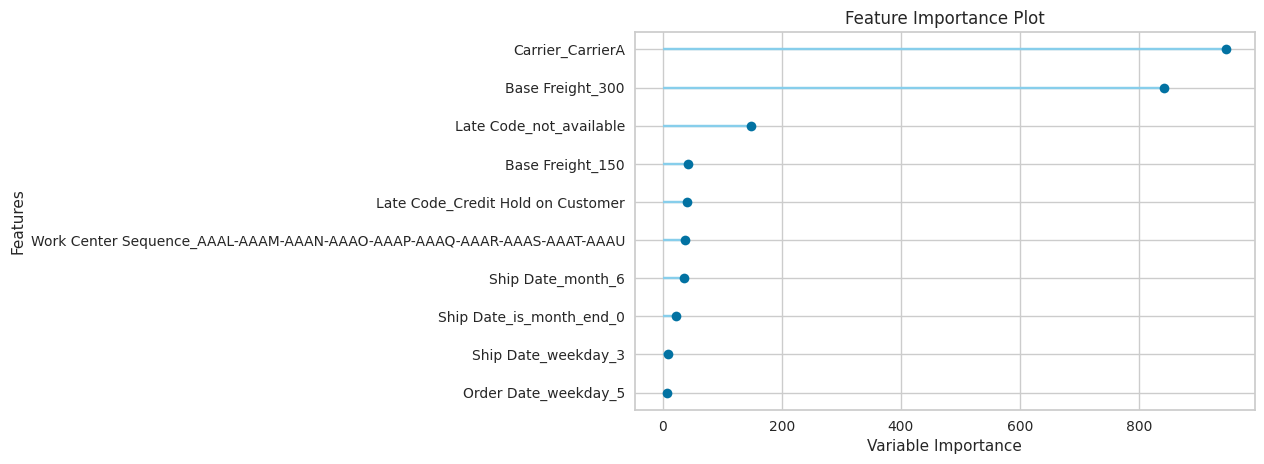

In [20]:
plot_model(best_model_reg[0], plot=plot_list[3])

The most important predictors for a lasso regression model predicting gross margin are Carrier A, Base Freight 300, and Late Code Not Available. These revealing features allow a business to see that Carrier A impacts gross margin more than other carriers. A base freight of 300 is more influential on gross margin than base freight with different amounts. Lastly, shipments that do not have a late code (not late) have a higher impact on margin.